## **MODULE 3: Fundamental analysis using Regression**

###***3.1***

In [ ]:
# Import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/GOLD.csv') #data of the last 2 years price action of Indian (MCX) gold standard.
df.head(5)

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,4-May-17,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,5-May-17,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,8-May-17,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,9-May-17,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,10-May-17,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [ ]:
df.tail(5) #EXPLORATION OF DATASET

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
507,26-Apr-19,31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,30-Apr-19,31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,1-May-19,31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,2-May-19,31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693
511,3-May-19,31341,31250,31500,31163,0.08K,0.44%,NaN,429.924911


In [ ]:
df.describe() #EXPLORATION OF DATASET

,Price,Open,High,Low,Pred,new
count,512.000000,512.000000,512.000000,512.000000,411.000000,512.000000
mean,30364.583984,30368.412109,30491.089844,30243.320312,341.712895,245.161859
std,1284.378623,1296.856656,1307.031684,1271.936410,271.075609,205.788897
min,27812.000000,27805.000000,27887.000000,27620.000000,-146.000000,11.109814
25%,29432.500000,29436.750000,29499.750000,29345.750000,156.500000,101.369172
50%,30427.500000,30399.500000,30545.000000,30286.000000,299.000000,184.537243
75%,31271.750000,31300.000000,31447.500000,31160.750000,475.000000,320.835031
max,33753.000000,34247.000000,34400.000000,33680.000000,2210.000000,1407.321485


In [ ]:
df.shape #EXPLORATION OF DATASET

(512, 9)

In [ ]:
df.dtypes

Date         object
Price         int64
Open          int64
High          int64
Low           int64
Vol.         object
Change %     object
Pred        float64
new         float64
dtype: object

In [ ]:
df.dropna(inplace=True)
df

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,4-May-17,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,5-May-17,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,8-May-17,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,9-May-17,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,10-May-17,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
406,4-Dec-18,30964,30874,31085,30874,0.08K,0.57%,-31.0,301.615081
407,5-Dec-18,30926,30830,30970,30825,0.04K,-0.12%,72.0,241.475101
408,6-Dec-18,31005,31039,31196,30974,10.55K,0.26%,35.0,188.222186
409,7-Dec-18,31440,31011,31480,30941,11.24K,1.40%,669.0,976.692705


*USING LINEAR REGRESSION AND POLYNOMIAL REGRESSION*

In [ ]:
#importing the needed libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

*Using polynomial function of "open" price column*

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = df["Open"].values
y = df["Pred"].values
X = X.reshape(-1, 1)
poly = PolynomialFeatures(degree=2)
poly_data = poly.fit_transform(X)

poly.fit(poly_data, y)
model = LinearRegression()
model.fit(poly_data,y)

coef = model.coef_
print(coef)
intercept = model.intercept_
print(intercept)

[ 0.00000000e+00  1.54222348e-01 -2.08822516e-06]
-2401.4667481303413


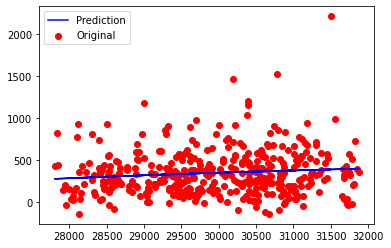

In [ ]:
y3_pred=model.predict(poly.fit_transform(X))
plt.scatter(X,y,color='red')
plt.plot(X, y3_pred,color='blue')
plt.legend(['Prediction','Original'])
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y,y3_pred))
r2 = r2_score(y,y3_pred)
print(rmse)
print(r2)

269.118959707757
0.011980144571252294


In [ ]:
x = df[['Price','Open','High','Low']]
y = df['new'].values.reshape(-1,1)
X_train, X_test, y_train, y_test =  train_test_split(x, y,
                                   test_size=0.2, random_state=42)

from sklearn.pipeline import make_pipeline
model=make_pipeline(PolynomialFeatures(),LinearRegression())
model.fit(X_train, y_train)  
predict=model.predict(x)

In [ ]:
print("THE FIRST TEN PREDICTIONS ARE : ",end=" ")
df_1 = pd.DataFrame()
df_1['ACTUAL'] = df['new']
df_1['PREDICTED'] = predict
df_1.head(10)

THE FIRST TEN PREDICTIONS ARE :  

,ACTUAL,PREDICTED
0,117.570740,117.623083
1,295.430176,295.443557
2,132.123714,132.106192
3,101.298064,101.300241
4,112.153318,112.136165
5,182.427089,182.425644
6,141.255137,141.252234
7,120.069010,120.048067
8,218.401641,218.401825
9,919.376358,919.249411


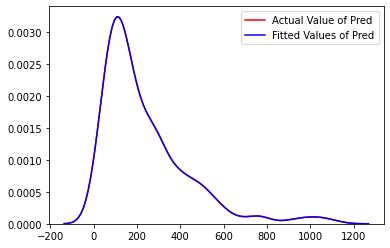

In [ ]:
import seaborn as sns
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value of Pred")
sns.distplot(predict, hist=False, color="b", label="Fitted Values of Pred" , ax=ax1)

*Using linear regression function of "open" price column*

In [ ]:
x = df['Open'].values.reshape(-1,1)
y = df['Pred'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
reg = LinearRegression()  
reg.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("INTERCEPT IS :",end=" ")
print(reg.intercept_)
print("COEFFICIENT IS :",end=" ")
print(reg.coef_)

INTERCEPT IS : [-875.85304311]
COEFFICIENT IS : [[0.04078453]]


In [ ]:
y_pred = reg.predict(x)
print("THE FIRST TEN PREDICTIONS ARE : ")
print(y_pred[0:10])

THE FIRST TEN PREDICTIONS ARE : 
[[282.42747829]
 [271.66036359]
 [272.02742432]
 [271.21173381]
 [268.56073966]
 [265.90974551]
 [269.70270637]
 [268.11210988]
 [267.13328127]
 [273.04703745]]


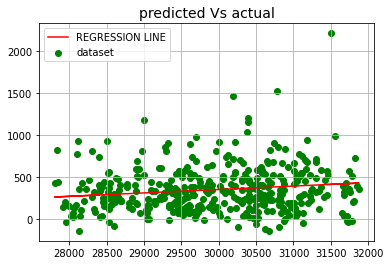

In [ ]:
plt.scatter(x,y,color='green',label="dataset")
plt.plot(x,y_pred, color='red',label="REGRESSION LINE")
plt.title('predicted Vs actual', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

*Using linear regression of high price column*

In [ ]:
x = df['High'].values.reshape(-1,1)
y = df['Pred'].values.reshape(-1,1)
X_train, X_test, y_train, y_test =  train_test_split(x, y,
                                   test_size=0.2, random_state=42)

reg1 = LinearRegression()  
reg1.fit(X_train, y_train) #training the algorithm

print("INTERCEPT IS :",end=" ")
print(reg1.intercept_)
print("COEFFICIENT IS :",end=" ")
print(reg1.coef_)

INTERCEPT IS : [-648.10403902]
COEFFICIENT IS : [[0.03306187]]


In [ ]:
y1_pred = reg1.predict(x)
print("THE FIRST TEN PREDICTIONS ARE : ",end=" ")
print(y1_pred[0:10])

THE FIRST TEN PREDICTIONS ARE :  [[293.56405589]
 [290.25786919]
 [286.05901208]
 [283.97611447]
 [282.45526859]
 [280.9344227 ]
 [284.07530007]
 [282.81894912]
 [282.88507286]
 [298.72170713]]


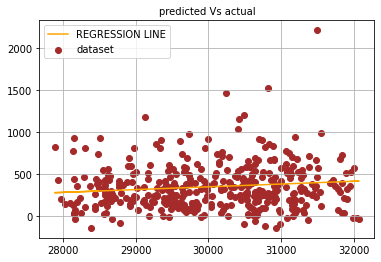

In [ ]:
plt.scatter(x,y,color='brown',label="dataset")
plt.plot(x,y1_pred, color='orange',label="REGRESSION LINE")
plt.title('predicted Vs actual', fontsize=10)
plt.legend()
plt.grid(True)
plt.show()

*Using linear regression on "low" price*

In [ ]:
x = df['Low'].values.reshape(-1,1)
y = df['Pred'].values.reshape(-1,1)
X_train, X_test, y_train, y_test =  train_test_split(x, y,
                                   test_size=0.2, random_state=42)

reg1 = LinearRegression()  
reg1.fit(X_train, y_train) #training the algorithm

print("INTERCEPT IS :",end=" ")
print(reg1.intercept_)
print("COEFFICIENT IS :",end=" ")
print(reg1.coef_)

INTERCEPT IS : [-102.10514715]
COEFFICIENT IS : [[0.01505017]]


In [ ]:
y3_pred = reg1.predict(x)
print("THE FIRST TEN PREDICTIONS ARE : ",end=" ")
print(y3_pred[0:10])

THE FIRST TEN PREDICTIONS ARE :  [[319.67588963]
 [321.33140841]
 [320.75950192]
 [318.5019763 ]
 [319.01368211]
 [318.47187596]
 [319.07388279]
 [319.23943467]
 [319.67588963]
 [321.85816439]]


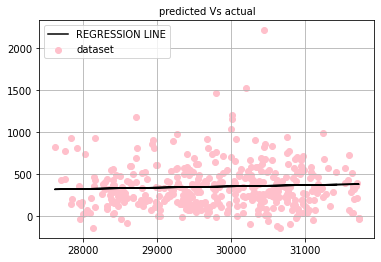

In [ ]:
plt.scatter(x,y,color='pink',label="dataset")
plt.plot(x,y3_pred, color='black',label="REGRESSION LINE")
plt.title('predicted Vs actual', fontsize=10)
plt.legend()
plt.grid(True)
plt.show()

MULTIPLE LINEAR REGRESSION :

In [ ]:
x = df[['Price','Open','High','Low']]
y = df['Pred'].values.reshape(-1,1)
X_train, X_test, y_train, y_test =  train_test_split(x, y,
                                   test_size=0.2, random_state=42)

reg1 = LinearRegression()  
reg1.fit(X_train, y_train) #training the algorithm

#Using linear regression, find the coefficients of the inputs
print("INTERCEPT IS :",end=" ")
print(reg1.intercept_)
print("COEFFICIENT IS :",end=" ")
print(reg1.coef_)

INTERCEPT IS : [6.82121026e-13]
COEFFICIENT IS : [[ 2.  3. -1. -4.]]


In [ ]:
y3_pred = reg1.predict(x)
print("THE FIRST TEN PREDICTIONS ARE : ",end=" ")
d = {'col1': df['Pred']}
df1 = pd.DataFrame()
df1['ACTUAL'] = df['Pred']
df1['PREDICTED'] = y3_pred
df1.head(10)

THE FIRST TEN PREDICTIONS ARE :  

,ACTUAL,PREDICTED
0,738.0,738.0
1,-146.0,-146.0
2,30.0,30.0
3,357.0,357.0
4,124.0,124.0
5,149.0,149.0
6,167.0,167.0
7,22.0,22.0
8,34.0,34.0
9,420.0,420.0


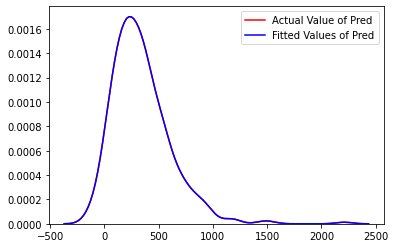

In [ ]:
import seaborn as sns
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value of Pred")
sns.distplot(y3_pred, hist=False, color="b", label="Fitted Values of Pred" , ax=ax1)

In [ ]:
df['Pred'] = y3_pred
df

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,4-May-17,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,5-May-17,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,8-May-17,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,9-May-17,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,10-May-17,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
406,4-Dec-18,30964,30874,31085,30874,0.08K,0.57%,-31.0,301.615081
407,5-Dec-18,30926,30830,30970,30825,0.04K,-0.12%,72.0,241.475101
408,6-Dec-18,31005,31039,31196,30974,10.55K,0.26%,35.0,188.222186
409,7-Dec-18,31440,31011,31480,30941,11.24K,1.40%,669.0,976.692705


**THUS WE CAN CONCLUDE THAT :**


1.   **PRED COLUMN IS A LINEAR FUNCTION OF THE INPUT COLUMNS**

2.   **NEW COLUMN IS A POLYNOMIAL FUNCTION OF THE INPUT COLUMNS**



***Distplots***

Plotting distplot to recognize the discrepencies

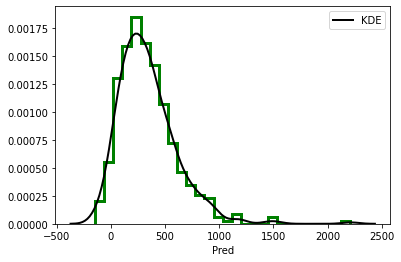

In [ ]:
import seaborn as sns
sns.distplot(df['Pred'],kde_kws={"color": "k", "lw": 2, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

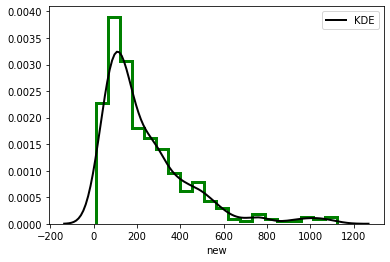

In [ ]:
sns.distplot(df['new'],kde_kws={"color": "k", "lw": 2, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

###**3.2**

***CAPM Analysis and Beta Calculation using regression***


*   Beta is a measure of a stock's volatility in relation to the overall market
*   The formula for calculating beta is the covariance of the return of an asset with the return of the benchmark divided by the variance of the return of the benchmark over a certain period.



In [ ]:
df1=pd.read_csv('/content/week2 (1).csv')
df1

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Day_Perc_Change,Trend
0,HINDUNILVR,EQ,15-May-2017,980.20,981.30,988.85,974.55,982.50,983.25,980.72,734446,7.202888e+08,32976,420159,57.21,5,2017,0.000000,Slight or No change
1,HINDUNILVR,EQ,16-May-2017,983.25,983.00,1002.50,982.05,999.50,1000.40,994.00,1503815,1.494798e+09,39717,669576,44.53,5,2017,1.744216,positive
2,HINDUNILVR,EQ,17-May-2017,1000.40,1004.00,1012.00,991.10,1009.00,1009.40,1003.84,1999387,2.007056e+09,63210,996054,49.82,5,2017,0.899640,Slight positive
3,HINDUNILVR,EQ,18-May-2017,1009.40,1008.00,1009.00,983.00,987.50,990.25,997.56,2690943,2.684374e+09,78098,983594,36.55,5,2017,-1.897167,Other
4,HINDUNILVR,EQ,19-May-2017,990.25,1000.00,1022.75,1000.00,1004.10,1008.00,1009.97,3059815,3.090316e+09,57429,1523108,49.78,5,2017,1.792477,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,HINDUNILVR,EQ,07-May-2019,1668.90,1678.80,1710.90,1672.50,1697.50,1697.50,1700.33,2212617,3.762183e+09,83971,1248858,56.44,5,2019,1.713704,positive
490,HINDUNILVR,EQ,08-May-2019,1697.50,1697.50,1697.50,1675.00,1690.15,1688.70,1686.13,1243338,2.096428e+09,105328,849935,68.36,5,2019,-0.518409,Other
491,HINDUNILVR,EQ,09-May-2019,1688.70,1680.10,1713.00,1677.00,1702.45,1703.75,1695.24,1204995,2.042757e+09,96629,821111,68.14,5,2019,0.891218,Slight positive
492,HINDUNILVR,EQ,10-May-2019,1703.75,1708.95,1709.00,1678.50,1686.00,1687.45,1694.39,1000696,1.695567e+09,98364,581135,58.07,5,2019,-0.956713,Other


In [ ]:
df_nifty=pd.read_csv('/content/Nifty50.csv')
df_nifty

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-17,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-17,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-17,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-17,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
...,...,...,...,...,...,...,...
489,7-May-19,11651.50,11657.05,11484.45,11497.90,337495624,16632.84
490,8-May-19,11478.70,11479.10,11346.95,11359.45,372826025,17440.01
491,9-May-19,11322.40,11357.60,11255.05,11301.80,373028059,17602.86
492,10-May-19,11314.15,11345.80,11251.05,11278.90,387323416,18085.19


CREATE A NEW COLUMN CONSISTING OF THE RETURNS

In [ ]:
df1['returns1']=df1['Close Price'].pct_change()
df1['returns1'][0]=0
df1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Day_Perc_Change,Trend,returns1
0,HINDUNILVR,EQ,15-May-2017,980.20,981.30,988.85,974.55,982.50,983.25,980.72,734446,7.202888e+08,32976,420159,57.21,5,2017,0.000000,Slight or No change,0.000000
1,HINDUNILVR,EQ,16-May-2017,983.25,983.00,1002.50,982.05,999.50,1000.40,994.00,1503815,1.494798e+09,39717,669576,44.53,5,2017,1.744216,positive,0.017442
2,HINDUNILVR,EQ,17-May-2017,1000.40,1004.00,1012.00,991.10,1009.00,1009.40,1003.84,1999387,2.007056e+09,63210,996054,49.82,5,2017,0.899640,Slight positive,0.008996
3,HINDUNILVR,EQ,18-May-2017,1009.40,1008.00,1009.00,983.00,987.50,990.25,997.56,2690943,2.684374e+09,78098,983594,36.55,5,2017,-1.897167,Other,-0.018972
4,HINDUNILVR,EQ,19-May-2017,990.25,1000.00,1022.75,1000.00,1004.10,1008.00,1009.97,3059815,3.090316e+09,57429,1523108,49.78,5,2017,1.792477,positive,0.017925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,HINDUNILVR,EQ,07-May-2019,1668.90,1678.80,1710.90,1672.50,1697.50,1697.50,1700.33,2212617,3.762183e+09,83971,1248858,56.44,5,2019,1.713704,positive,0.017137
490,HINDUNILVR,EQ,08-May-2019,1697.50,1697.50,1697.50,1675.00,1690.15,1688.70,1686.13,1243338,2.096428e+09,105328,849935,68.36,5,2019,-0.518409,Other,-0.005184
491,HINDUNILVR,EQ,09-May-2019,1688.70,1680.10,1713.00,1677.00,1702.45,1703.75,1695.24,1204995,2.042757e+09,96629,821111,68.14,5,2019,0.891218,Slight positive,0.008912
492,HINDUNILVR,EQ,10-May-2019,1703.75,1708.95,1709.00,1678.50,1686.00,1687.45,1694.39,1000696,1.695567e+09,98364,581135,58.07,5,2019,-0.956713,Other,-0.009567


CREATE A NEW COLUMN CONSISTING OF RETURNS OF NIFTY

In [ ]:
#creating a column in nifty which contains the daily returns
df_nifty['returns']=df_nifty['Close'].pct_change()
df_nifty['returns'][0]=0
df_nifty

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),returns
0,15-May-17,9433.55,9449.25,9423.10,9445.40,145163953,7790.97,0.000000
1,16-May-17,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,0.007078
2,17-May-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,0.001419
3,18-May-17,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,-0.010109
4,19-May-17,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,-0.000164
...,...,...,...,...,...,...,...,...
489,7-May-19,11651.50,11657.05,11484.45,11497.90,337495624,16632.84,-0.008652
490,8-May-19,11478.70,11479.10,11346.95,11359.45,372826025,17440.01,-0.012041
491,9-May-19,11322.40,11357.60,11255.05,11301.80,373028059,17602.86,-0.005075
492,10-May-19,11314.15,11345.80,11251.05,11278.90,387323416,18085.19,-0.002026


CALCULATING BETA FOR LAST 3 MONTHS(90 DAYS)

In [ ]:
#The daily Beta value for the past 3 months. (Daily= Daily returns)

y = df1['returns1'].tail(90).values.reshape(-1,1)
x = df_nifty['returns'].tail(90).values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
reg1 = LinearRegression()  
reg1.fit(X_train, y_train) #training the algorithm

print("INTERCEPT (ALPHA) IS :",end=" ")
print(reg1.intercept_)
print("COEFFICIENT (BETA) IS :",end=" ")
print(reg1.coef_)

INTERCEPT (ALPHA) IS : [-0.00070961]
COEFFICIENT (BETA) IS : [[0.40389234]]


*   *THE BETA VALUE IS :0.40389234 FOR DAY RETURNS.*
*   *THE ALPHA VALUE IS :-0.00070961 FOR DAY RETURNS.*

In [ ]:
y3_pred = reg1.predict(x)
print("THE LAST TEN PREDICTIONS ARE : ",end=" ")
d = {'col1': df['Pred']}
df2 = pd.DataFrame()
df2['ACTUAL'] =(df1['Day_Perc_Change'].tail(90))/100
df2['PREDICTED'] = y3_pred
df2.tail(10)

THE LAST TEN PREDICTIONS ARE :  

,ACTUAL,PREDICTED
484,0.007583,0.003206
485,0.005923,-0.000933
486,-0.019429,-0.001514
487,-0.017406,-0.001140
488,-0.014555,-0.004641
489,0.017137,-0.004204
490,-0.005184,-0.005573
491,0.008912,-0.002759
492,-0.009567,-0.001528
493,0.008622,-0.005390


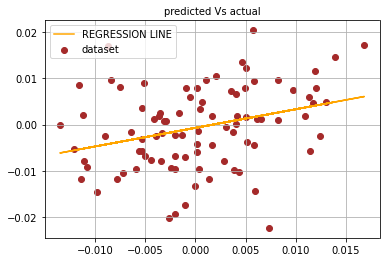

In [ ]:
plt.scatter(x,y,color='brown',label="dataset")
plt.plot(x,y3_pred, color='orange',label="REGRESSION LINE")
plt.title('predicted Vs actual', fontsize=10)
plt.legend()
plt.grid(True)
plt.show()

MONTHLY BETA VALUE PREDICTION

In [ ]:
df2=pd.DataFrame()
print("MONTHLY RETURNS OF THE STOCK HINDUSTAN UNILEVER")
df2['Monthly returns']=df1.groupby(['Year','Month']).apply(lambda x: np.average(x['Close Price']))
df2

MONTHLY RETURNS OF THE STOCK HINDUSTAN UNILEVER


Monthly returns
Year Month                 
2017 5          1028.384615
     6          1096.764286
     7          1133.942857
     8          1185.023810
     9          1229.400000
     10         1239.947500
     11         1264.009091
     12         1322.307500
2018 1          1366.327273
     2          1339.431579
     3          1310.942105
     4          1424.426190
     5          1538.561364
     6          1603.819048
     7          1684.140909
     8          1758.142857
     9          1625.877778
     10         1567.716667
     11         1688.152500
     12         1822.995000
2019 1          1767.434783
     2          1781.195000
     3          1704.792105
     4          1711.663158
     5          1695.675000

In [ ]:
print("MONTHLY RETURNS OF THE STOCK HINDUSTAN UNILEVER")
print(" ")
df2['perc_monthly_return']=df2.pct_change()
df2['perc_monthly_return'][0]=0
print(df2) #returns of the month

MONTHLY RETURNS OF THE STOCK HINDUSTAN UNILEVER
 
            Monthly returns  perc_monthly_return
Year Month                                      
2017 5          1028.384615             0.000000
     6          1096.764286             0.066492
     7          1133.942857             0.033898
     8          1185.023810             0.045047
     9          1229.400000             0.037448
     10         1239.947500             0.008579
     11         1264.009091             0.019405
     12         1322.307500             0.046122
2018 1          1366.327273             0.033290
     2          1339.431579            -0.019685
     3          1310.942105            -0.021270
     4          1424.426190             0.086567
     5          1538.561364             0.080127
     6          1603.819048             0.042415
     7          1684.140909             0.050082
     8          1758.142857             0.043940
     9          1625.877778            -0.075230
     10         156

In [ ]:
df_nifty.astype({'Date': 'datetime64[ns]'}).dtypes 

Date                 datetime64[ns]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Shares Traded                 int64
Turnover (Rs. Cr)           float64
returns                     float64
dtype: object

In [ ]:
import datetime
df_nifty['Month'] = pd.DatetimeIndex(df_nifty['Date']).month #to extract month from date
df_nifty['Year'] = pd.DatetimeIndex(df_nifty['Date']).year    #to extract year from the date
df_nifty

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),returns,Month,Year
0,15-May-17,9433.55,9449.25,9423.10,9445.40,145163953,7790.97,0.000000,5,2017
1,16-May-17,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,0.007078,5,2017
2,17-May-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,0.001419,5,2017
3,18-May-17,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,-0.010109,5,2017
4,19-May-17,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,-0.000164,5,2017
...,...,...,...,...,...,...,...,...,...,...
489,7-May-19,11651.50,11657.05,11484.45,11497.90,337495624,16632.84,-0.008652,5,2019
490,8-May-19,11478.70,11479.10,11346.95,11359.45,372826025,17440.01,-0.012041,5,2019
491,9-May-19,11322.40,11357.60,11255.05,11301.80,373028059,17602.86,-0.005075,5,2019
492,10-May-19,11314.15,11345.80,11251.05,11278.90,387323416,18085.19,-0.002026,5,2019


In [ ]:
df3=pd.DataFrame()
print("MONTHLY RETURNS OF NIFTY")
print(" ")
df3['Monthly return']=df_nifty.groupby(['Year','Month']).apply(lambda x: np.average(x['Close']))
df3

MONTHLY RETURNS OF NIFTY
 


Monthly return
Year Month                
2017 5         9498.557692
     6         9606.954762
     7         9850.119048
     8         9901.183333
     9         9977.916667
     10       10138.677500
     11       10324.754545
     12       10322.262500
2018 1        10771.154545
     2        10533.105263
     3        10232.618421
     4        10472.933333
     5        10664.447727
     6        10742.973810
     7        10991.156818
     8        11498.440476
     9        11297.058333
     10       10383.809524
     11       10621.792500
     12       10778.442500
2019 1        10809.463043
     2        10833.840000
     3        11317.242105
     4        11666.452632
     5        11452.687500

In [ ]:
df3['perc_monthly_returns']=df3.pct_change()
df3['perc_monthly_returns'][0]=0
print(df3)

            Monthly return  perc_monthly_returns
Year Month                                      
2017 5         9498.557692              0.000000
     6         9606.954762              0.011412
     7         9850.119048              0.025311
     8         9901.183333              0.005184
     9         9977.916667              0.007750
     10       10138.677500              0.016112
     11       10324.754545              0.018353
     12       10322.262500             -0.000241
2018 1        10771.154545              0.043488
     2        10533.105263             -0.022101
     3        10232.618421             -0.028528
     4        10472.933333              0.023485
     5        10664.447727              0.018287
     6        10742.973810              0.007363
     7        10991.156818              0.023102
     8        11498.440476              0.046154
     9        11297.058333             -0.017514
     10       10383.809524             -0.080840
     11       10621.

In [ ]:
#The monthly Beta value. (Monthly= Monthly returns)

y = df2['perc_monthly_return'].values.reshape(-1,1)
x = df3['perc_monthly_returns'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
reg1 = LinearRegression()  
reg1.fit(X_train, y_train) #training the algorithm

print("INTERCEPT (ALPHA) IS :",end=" ")
print(reg1.intercept_)
print("COEFFICIENT (BETA) IS :",end=" ")
print(reg1.coef_)

INTERCEPT (ALPHA) IS : [0.02003885]
COEFFICIENT (BETA) IS : [[0.66850356]]




*   *THE BETA VALUE IS :0.66850356 FOR MONTHLY RETURNS.*
*   *THE ALPHA VALUE IS :0.02003885 FOR MONTHLY RETURNS.*











In [ ]:
y3_pred = reg1.predict(x)
print("THE LAST TEN PREDICTIONS ARE : ",end=" ")
df4 = pd.DataFrame()
df4['ACTUAL'] =df2['perc_monthly_return']
df4['PREDICTED'] = y3_pred
df4

THE LAST TEN PREDICTIONS ARE :  

ACTUAL  PREDICTED
Year Month                     
2017 5      0.000000   0.020039
     6      0.066492   0.027668
     7      0.033898   0.036960
     8      0.045047   0.023504
     9      0.037448   0.025220
     10     0.008579   0.030810
     11     0.019405   0.032308
     12     0.046122   0.019877
2018 1      0.033290   0.049111
     2     -0.019685   0.005264
     3     -0.021270   0.000968
     4      0.086567   0.035739
     5      0.080127   0.032264
     6      0.042415   0.024961
     7      0.050082   0.035483
     8      0.043940   0.050893
     9     -0.075230   0.008331
     10    -0.035772  -0.034003
     11     0.076822   0.035360
     12     0.079876   0.029898
2019 1     -0.030477   0.021963
     2      0.007785   0.021546
     3     -0.042894   0.049867
     4      0.004030   0.040667
     5     -0.009341   0.007790

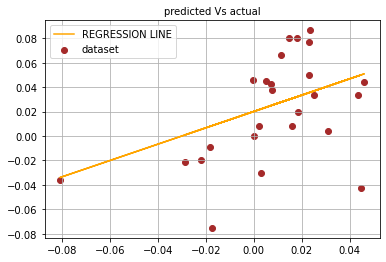

In [ ]:
plt.scatter(x,y,color='brown',label="dataset")
plt.plot(x,y3_pred, color='orange',label="REGRESSION LINE")
plt.title('predicted Vs actual', fontsize=10)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y,y3_pred))
r2 = r2_score(y,y3_pred)
print("RMSE IS ",end="")
print(rmse)
print("R^2 IS ",end="")
print(r2)

RMSE IS 0.037454616213898353
R^2 IS 0.21564448530499458


###**INFERENCE**
1.    Beta can be referred to as a measure of the sensitivity of stock returns to market returns.
2.   A stock with a beta less than one tends to be less volatile.
3. A stock with a beta more than one tends to be more volatile.
4. Here the beta values are less than one as well as positive so stock is less volatile.
5. It means that for every +1% move in the Nifty our portfolio will go up 0.4% in value.[DAILY RETURNS]
6. Thus we can conclude that buying the stock is less risky but will offer less returns as well.
